# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [1]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import torch
from sklearn.preprocessing import StandardScaler
%matplotlib inline

 Using the code from the previous cell as instructed for the assignment resulted in some errors that I wasn't able to proceed. Therefore I am using the following code to load the CIFAR data

In [2]:
# loading the dataset
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

In [3]:
#checking the shape of the data
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
# finding the classes
y_unique = np.unique(y_train)
y_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
# standardizing the 4D data
SS = StandardScaler()
n_samples, n_height, n_width, n_channels = X_train.shape
X_train_flattened = X_train.reshape((n_samples, n_height * n_width * n_channels))
X_train_SS = SS.fit_transform(X_train_flattened)

## Principle Component Analysis
   PCA with 5 components is being used here to transform the data to a lower dimension. The input values are standardized as well. 

In [7]:
# defining PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [8]:
# fiting and triansforming the X_train using PCA()
X_pca = pca.fit_transform(X_train_SS[:2000])

/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/924045832.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


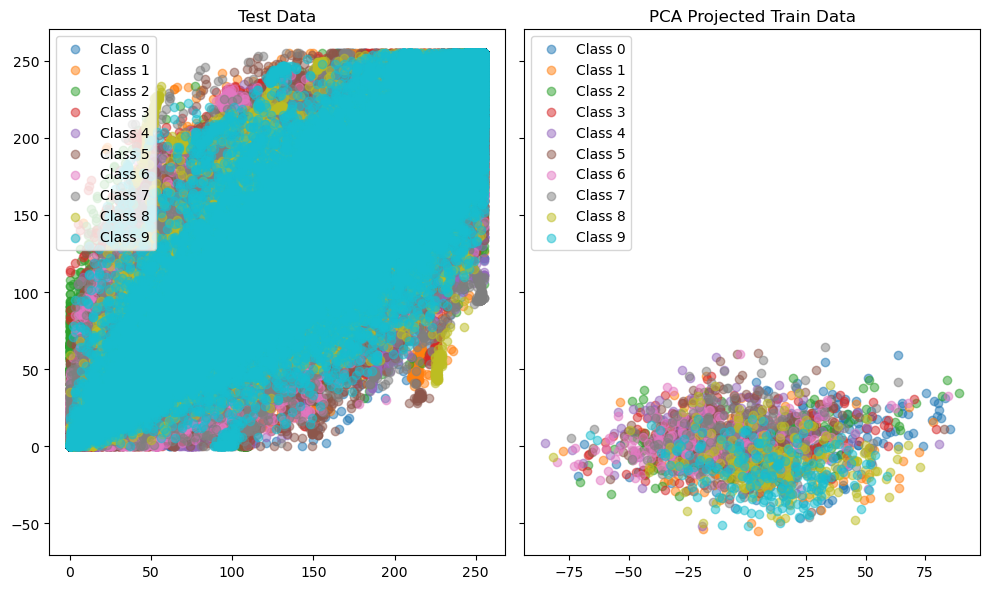

In [9]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (PCA) colored by class labels
for i in range(10):
    indices = y_train.flatten()[:2000] == i 
    ax2.scatter(X_pca[indices, 0], X_pca[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('PCA Projected Train Data')
plt.tight_layout()

plt.show()

 From the 2D color map above, it is clear that the PCA transforms the data in such a way that we are able to view the data distribution from a different angle, but still similar to the original distribution. The X axis is defined such that it represents the dimension with max variance. It captures the overall distribution.

## Isomap Embedding

In [10]:
# defining Isomap embedding
from sklearn.manifold import Isomap
imap = Isomap(n_components=2)
X_imap = imap.fit_transform(X_train_SS[:2000])


/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/4112875542.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


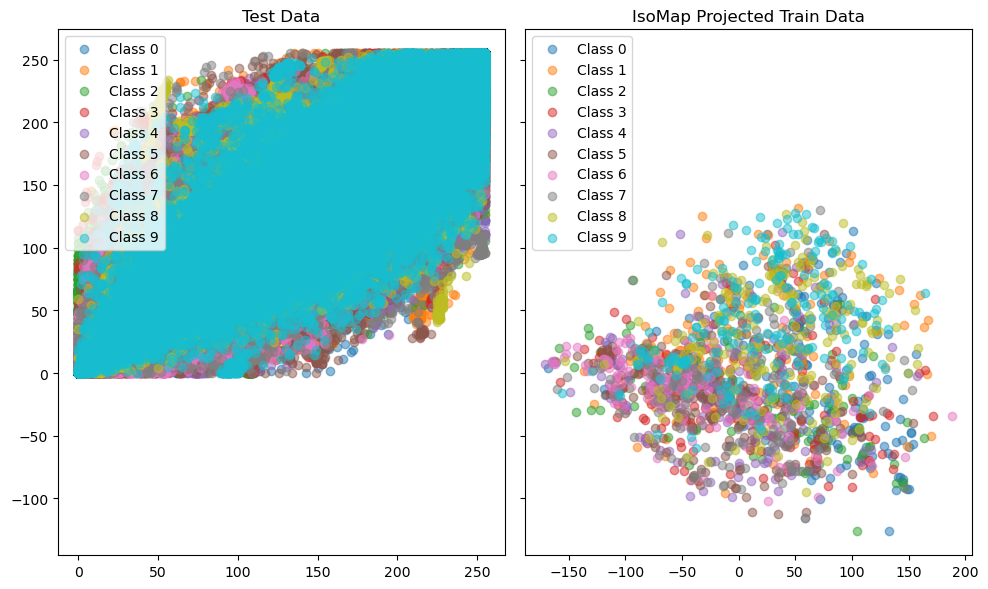

In [11]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_train.flatten()[:2000] == i 
    ax2.scatter(X_imap[indices, 0], X_imap[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('IsoMap Projected Train Data')
plt.tight_layout()

plt.show()

  It transforms the dimesnions better than PCA, by showing the local relations between different points.

## Locally Linear Embedding

In [12]:
# Defining LLE
from sklearn import manifold
lle_standard = manifold.LocallyLinearEmbedding(method="standard", n_neighbors= 5,n_components= 2, eigen_solver = "auto",random_state= 42)
X_lle = lle_standard.fit_transform(X_train_SS[:2000])

/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/1170264721.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


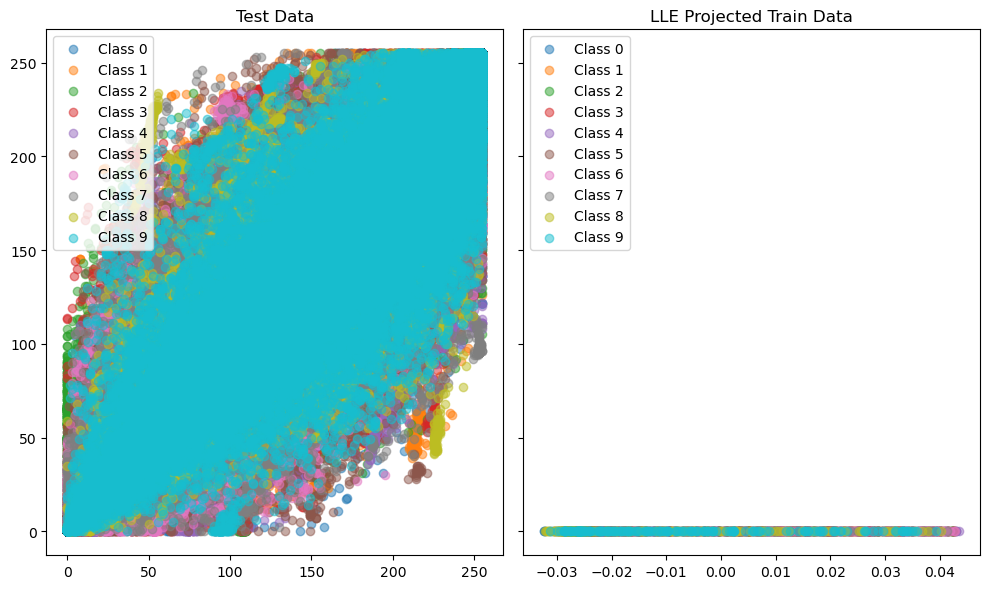

In [13]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_train.flatten()[:2000] == i 
    ax2.scatter(X_lle[indices, 0], X_lle[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('LLE Projected Train Data')
plt.tight_layout()

plt.show()

  The LLE transformation is not giving useful insights as it fails to identify any relation among the data points.

## Multidimensional scaling

In [14]:
# defining Multidimensional Scaling as mds
from sklearn.manifold import MDS
mds = MDS(n_components=2,
    random_state=42)
# choosing 1000 random points from training data to speed up the execution
indices = np.random.choice(len(X_train), 2000, replace=False)
X_subset = X_train_SS[indices]
y_subset = y_train[indices]
# fitting on the data
X_mds = mds.fit_transform(X_subset)

/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/1073846860.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


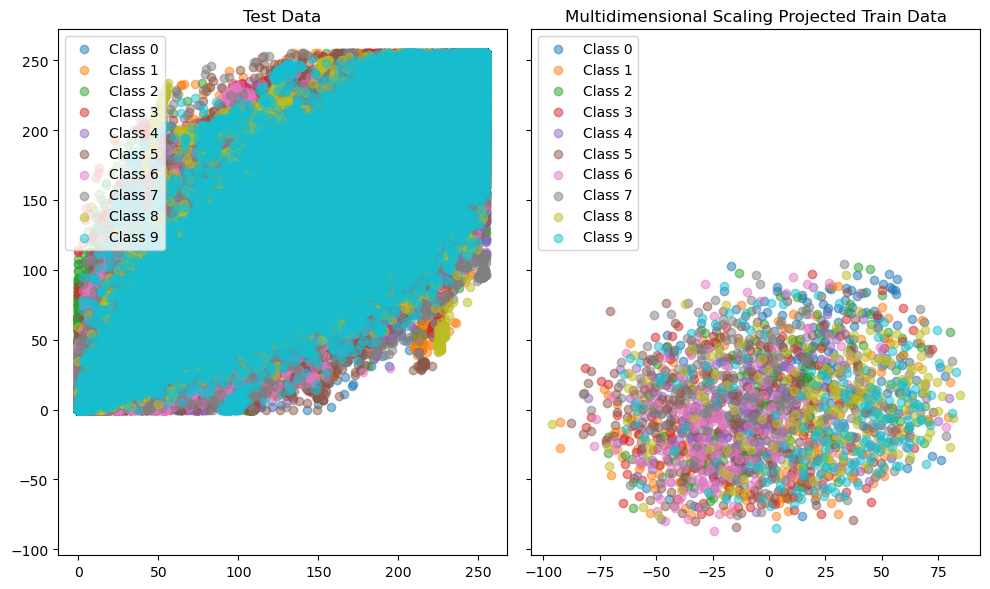

In [15]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_subset.flatten() == i  
    ax2.scatter(X_mds[indices, 0], X_mds[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('Multidimensional Scaling Projected Train Data')
plt.tight_layout()

plt.show()

  The transformation is better than the original test data, A differnt angle of the data distribution is visible. 

## SpectralEmbedding

In [16]:
# importing and definig Spectral Embedding
from sklearn.manifold import SpectralEmbedding
spec_emb = SpectralEmbedding(n_components=2, random_state=42)

In [17]:
# selecting random 1000 train data to speed up the execution
indices = np.random.choice(len(X_train), 2000, replace=False)
X_subset = X_train_SS[indices]
y_subset = y_train[indices]
X_spec = spec_emb.fit_transform(X_subset)

/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/488651629.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


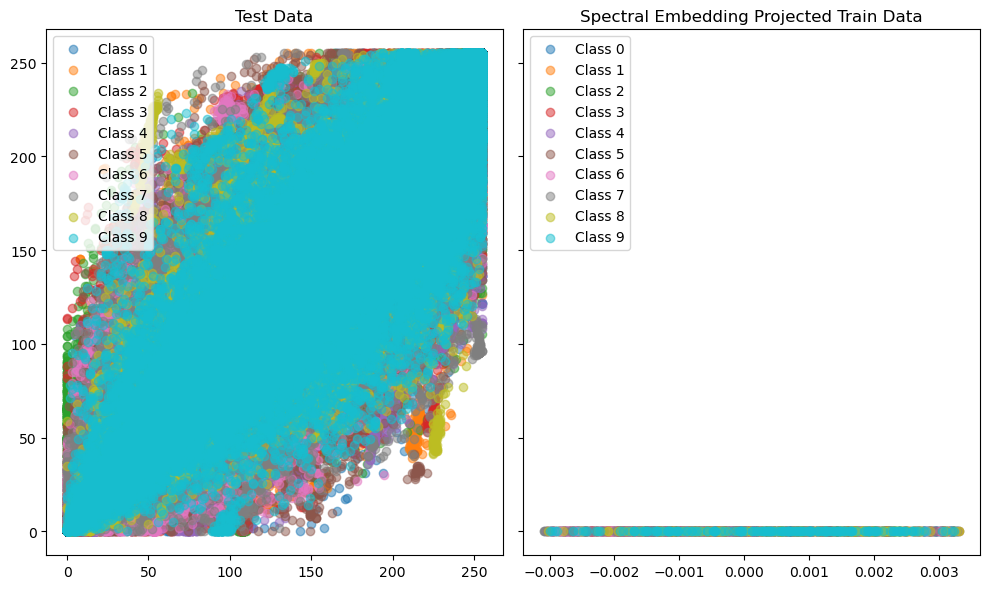

In [18]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_subset.flatten() == i  
    ax2.scatter(X_spec[indices, 0], X_spec[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('Spectral Embedding Projected Train Data')
plt.tight_layout()

plt.show()

  The spectral Embedding fails to visualize any relations between the data points.

## T-distributed Stochastic Neighbor Embedding

In [19]:
# importing and defining TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

In [20]:
# choosing random 1000 points to speed up the execution
indices = np.random.choice(len(X_train), 2000, replace=False)
X_subset = X_train_SS[indices]
y_subset = y_train[indices]
X_tsne = tsne.fit_transform(X_subset)

/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/674171404.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


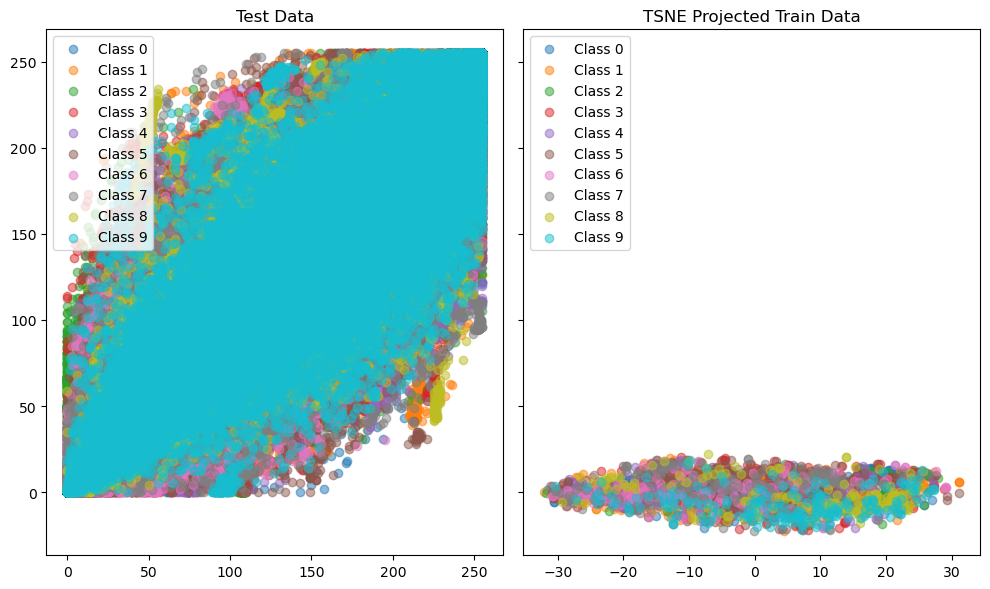

In [21]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_subset.flatten() == i  
    ax2.scatter(X_tsne[indices, 0], X_tsne[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and titles
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('TSNE Projected Train Data')
plt.tight_layout()

plt.show()

 TSNE show a different angle of the data distribution, better transformation.

## UMAP

In [22]:
# defining and importing Umap
import umap.umap_ as umap
umap_model = umap.UMAP(random_state=42)

In [23]:
# selecting random 1000 points to speed up the execution
indices = np.random.choice(len(X_train), 2000, replace=False)
X_subset = X_train_SS[indices]
y_subset = y_train[indices]
X_umap = umap_model.fit_transform(X_subset)

/Users/abhinapremachandran/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/var/folders/58/d2d8ywx11fj19xch8rvj4pjr0000gn/T/ipykernel_70161/2275014814.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


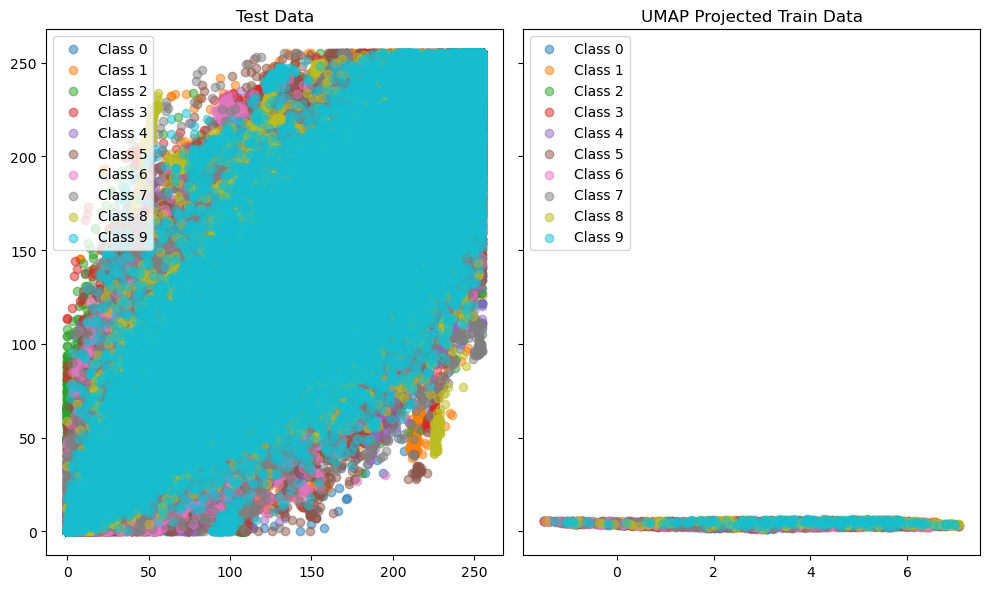

In [24]:
# Create a colormap with 10 discrete colors
colors = plt.cm.get_cmap('tab10', 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot test data colored by class labels
for i in range(10):
    indices = y_test.flatten() == i
    ax1.scatter(X_test[indices, 0], X_test[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Plot train data (Isomap) colored by class labels
for i in range(10):
    indices = y_subset.flatten() == i  
    ax2.scatter(X_umap[indices, 0], X_umap[indices, 1], color=colors(i), label=f'Class {i}', alpha=0.5)

# Add legends and titles
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_title('Test Data')
ax2.set_title('UMAP Projected Train Data')
plt.tight_layout()

plt.show()

<p> U map also fails at visualizing the relations between the data points. Not a useful transformation. </p> 
 <p>From the 2D colored plots of the data points transformed using the various manifold learning algorithms, Locally Linear Embedding, Spectral Embedding and UMAP transformations appear to be approximately linear one - dimensional versions, without giving much detail on the structure of data. PCA, IsoMAP, Multidimensional Scaling tranformed the data by preserving the overall structure. </p>
   <p>It looks like out of all algorithms used, IsoMap mapped the data to lower dimension by preserving the overall and local structures. </p>